In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1 Import the data from medical_examination.csv and assign it to the df variable

df = pd.read_csv('medical_examination.csv')

In [3]:
# 2 Create the overweight column in the df variable

df['overweight'] = df['weight'] / ((df['height'] /100) ** 2 )
df['overweight'] = np.where( df['weight'] / ((df['height'] /100) ** 2 ) > 25, 1, 0)

In [4]:
# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [8]:
# 4 Draw the Categorical Plot in the draw_cat_plot function
#def draw_cat_plot():

# 5
# Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

df_cat = pd.melt(df,
    id_vars=['cardio'],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
)

# 6
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total'))

print(df_cat)


    cardio     variable  value  total
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  15915
9        0   overweight      1  19106
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  10539
21       1   overweight      1  24440
22       1        smoke      0  32050
23       1        smoke      1   2929


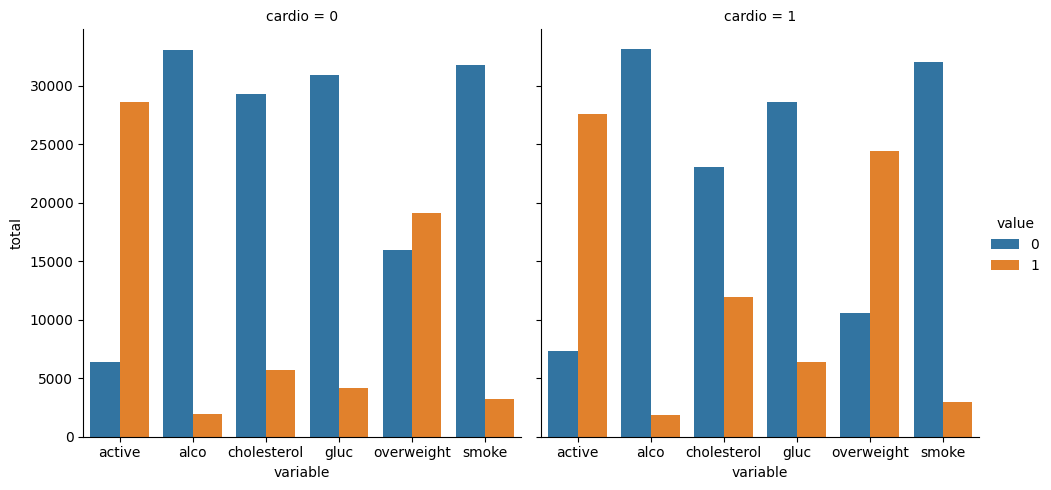

In [9]:
# 7
# Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()
# Draw the catplot with 'sns.catplot()'
sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])



# 8
# Get the figure for the output and store it in the fig variable
# fig = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]).fig



# 9
# Do not modify the next two lines
#fig.savefig('catplot.png')
#return fig

In [11]:
# 10
# Draw the Heat Map in the draw_heat_map function

#def draw_heat_map():

#11
# Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

df_heat = df[ (df['weight'] <= df['weight'].quantile(0.975))  #5 weight is more than the 97.5th percentile
        & (df['weight'] >= df['weight'].quantile(0.025)) #4 weight is less than the 2.5th percentile
        & (df['height'] <= df['height'].quantile(0.975)) #3 height is more than the 97.5th percentile
        & (df['height'] >= df['height'].quantile(0.025)) #2 height is less than the 2.5th percentile
        & (df['ap_lo'] <= df['ap_hi'])] #1 diastolic pressure is higher than systolic ap_lo > ap_hi


In [13]:
# 12
# Calculate the correlation matrix and store it in the corr variable

corr = df_heat.corr()

# 13
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

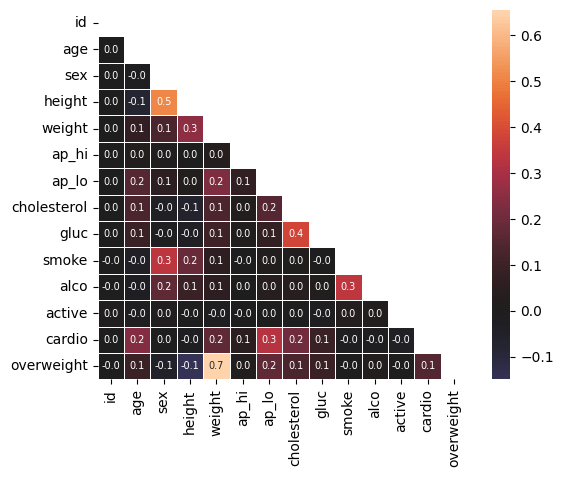

In [14]:

# 14
# Set up the matplotlib figure.

fig, ax = plt.subplots()

# 15
# Draw the heatmap with 'sns.heatmap()'
heatmap_fig = sns.heatmap(corr, annot=True, square=True, center=0, annot_kws={'fontsize':7 }, linewidths=0.5, mask=mask, fmt='.1f')
#fig = heatmap_fig.figure

# 16
# Do not modify the next two lines
#fig.savefig('heatmap.png')
#return fig